# Exercício de Programação 5: Regressão

<font color="red">**Prazo de submissão: 23:55 do dia 16/03/2021** </font>

2020.2 Álgebra Linear Computacional - DCC - UFMG

Erickson - Fabricio

Instruções:
* Antes de submeter suas soluções, certifique-se de que tudo roda como esperado. Primeiro, **reinicie o kernel** no menu, selecione Kernel$\rightarrow$Restart e então execute **todas as células** (no menu, Cell$\rightarrow$Run All)
* Apenas o arquivo .ipynb deve ser submetido. Ele não deve ser compactado.
* Não deixe de preencher seu nome e número de matrícula na célula a seguir

**Nome do aluno:** Robert Garcia da Silva

**Matricula:** 2019436676

## Carregando os dados

Iremos carregar os dados usando a biblioteca ```pandas```. Não se preocupe se você não conhece a biblioteca, pois o nosso objetivo é apenas extrair a matriz de dados $X$. Segue uma descrição do dataset, retirada [daqui](http://statweb.stanford.edu/~owen/courses/202/Cereals.txt).

* Datafile Name: Cereals
* Datafile Subjects: Food , Health
* Story Names: Healthy Breakfast
* Reference: Data available at many grocery stores
* Authorization: free use
* Description: Data on several variable of different brands of cereal.

A value of -1 for nutrients indicates a missing observation.
Number of cases: 77
Variable Names:

  1. Name: Name of cereal
  2. mfr: Manufacturer of cereal where A = American Home Food Products; G =
     General Mills; K = Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R
     = Ralston Purina
  3. type: cold or hot
  4. calories: calories per serving
  5. protein: grams of protein
  6. fat: grams of fat
  7. sodium: milligrams of sodium
  8. fiber: grams of dietary fiber
  9. carbo: grams of complex carbohydrates
  10. sugars: grams of sugars
  11. potass: milligrams of potassium
  12. vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
  13. shelf: display shelf (1, 2, or 3, counting from the floor)
  14. weight: weight in ounces of one serving
  15. cups: number of cups in one serving
  16. rating: a rating of the cereals

In [ ]:
#Execute esta célula para instalar o pandas caso já não tenha instalado
# import sys
# !{sys.executable} -m pip install --user pandas

In [1]:
import pandas as pd
df = pd.read_table('cereal.txt',sep='\s+',index_col='name')
df

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445


A seguir iremos remover as linhas correspondentes aos cereais que possuem dados faltantes, representados pelo valor -1.
Também iremos remover as colunas com dados categóricos 'mfr' e 'type', e os dados numéricos, 'shelf', 'weight' e 'cups'.

In [2]:
import numpy as np
new_df = df.replace(-1,np.nan)
new_df = new_df.dropna()
new_df = new_df.drop(['mfr','type','shelf','weight','cups'],axis=1)
new_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
name,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,93.704912
Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,29.509541
...,...,...,...,...,...,...,...,...,...,...
Triples,110,2,1,250,0.0,21.0,3.0,60.0,25,39.106174
Trix,110,1,1,140,0.0,13.0,12.0,25.0,25,27.753301
Wheat_Chex,100,3,1,230,3.0,17.0,3.0,115.0,25,49.787445


Finalmente, iremos converter os dados nutricionais numéricos de ```new_df``` para uma matriz ```dados``` e as avaliações (ratings) para um vetor $y$. Os nomes dos cereais serão salvos em uma lista ```cereral_names``` e os nomes das colunas em uma lista ```col_names```.

In [3]:
cereral_names = list(new_df.index)
print('Cereais:',cereral_names)
col_names = list(new_df.columns)
print('Colunas:',col_names)

dados = new_df.drop('rating', axis=1).values
print('As dimensões de dados são:',dados.shape)
y = new_df['rating'].values
print('As dimensões de y são:',y.shape)

Cereais: ['100%_Bran', '100%_Natural_Bran', 'All-Bran', 'All-Bran_with_Extra_Fiber', 'Apple_Cinnamon_Cheerios', 'Apple_Jacks', 'Basic_4', 'Bran_Chex', 'Bran_Flakes', "Cap'n'Crunch", 'Cheerios', 'Cinnamon_Toast_Crunch', 'Clusters', 'Cocoa_Puffs', 'Corn_Chex', 'Corn_Flakes', 'Corn_Pops', 'Count_Chocula', "Cracklin'_Oat_Bran", 'Crispix', 'Crispy_Wheat_&_Raisins', 'Double_Chex', 'Froot_Loops', 'Frosted_Flakes', 'Frosted_Mini-Wheats', 'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats', 'Fruitful_Bran', 'Fruity_Pebbles', 'Golden_Crisp', 'Golden_Grahams', 'Grape_Nuts_Flakes', 'Grape-Nuts', 'Great_Grains_Pecan', 'Honey_Graham_Ohs', 'Honey_Nut_Cheerios', 'Honey-comb', 'Just_Right_Crunchy__Nuggets', 'Just_Right_Fruit_&_Nut', 'Kix', 'Life', 'Lucky_Charms', 'Maypo', 'Muesli_Raisins,_Dates,_&_Almonds', 'Muesli_Raisins,_Peaches,_&_Pecans', 'Mueslix_Crispy_Blend', 'Multi-Grain_Cheerios', 'Nut&Honey_Crunch', 'Nutri-Grain_Almond-Raisin', 'Nutri-grain_Wheat', 'Oatmeal_Raisin_Crisp', 'Post_Nat._Raisin_Bran', 'Prod

## Estimando os parâmetros da regressão linear simples

Qual será a relação entre a avaliação $y$ e o número de calorias $x$ de um cereal? Para responder esta pergunta, considere uma regressão linear simples
$$
y = \beta_0 + \beta_1 x.
$$
Para encontrar os coeficientes $\beta_0$ e $\beta_1$ utilizando o método dos mínimos quadrados, basta resolver o sistema
$$
\begin{bmatrix}
n & \sum_i x^{(i)} \\
\sum_i x^{(i)} & \sum_i (x^{(i)})^2
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\ \beta_1
\end{bmatrix}
=
\begin{bmatrix}
\sum_i y^{(i)} \\ \sum_i x^{(i)} y^{(i)}
\end{bmatrix}
$$

Portanto, para encontrar $\beta_0$ e $\beta_1$, você precisa
1. Calcular a matriz
$$
A = \begin{bmatrix}
n & \sum_i x^{(i)} \\
\sum_i x^{(i)} & \sum_i (x^{(i)})^2
\end{bmatrix}
$$
e o vetor
$$
c = \begin{bmatrix}
\sum_i y^{(i)} \\ \sum_i x^{(i)} y^{(i)}
\end{bmatrix}
$$
2. Resolver $A \beta = c$, onde $\beta$ é o vetor de coeficientes.

**Exercício 1 - Regressão simples:** Encontre os coeficientes $\beta_0$ e $\beta_1$ quando a variável independente é ```calories```. Dica: A variavel X abaixo já armazena os valores deste atributo.

In [72]:
X = new_df['calories'].values

# insira seu código aqui

import numpy as np

# Veja [1]
def aplica_minimosQuadrados(X_array, y_vet):
    b = np.array([]) # y = B + A1*x1 + A2*x2 + ... + An*xn
    
    # Se X_array é um vetor tranforma ele para uma matriz com uma coluna
    if(len(X_array.shape) == 1):
        X_array = X_array.reshape(len(y_vet),-1)
    
    #Adiciona a primeira coluna com 1's
    X = np.ones(len(y_vet))
    
    for col in range(X_array.shape[1]):
        X = np.c_[X, X_array[:,col]] # np.c_ Think col stak, veja [2]
    
    
    b = np.linalg.inv(X.T@X)@(X.T@y_vet)
    
    return b # return (B + A1*x1 + A2*x2 + ... + An*xn)

beta0, beta1 = aplica_minimosQuadrados(X, y)

y_pred01 = X.reshape(len(X),-1)@np.array([beta1])+beta0

print('Beta_0: ', beta0)
print('Beta_1: ', beta1)

Beta_0:  94.88442776589
Beta_1:  -0.49064841182775965


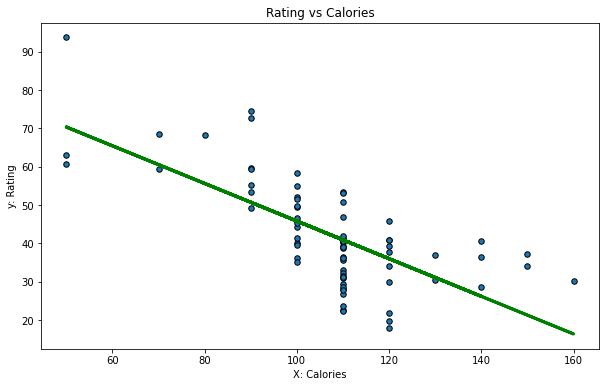

In [73]:

#Simple plot to verify the answer

import matplotlib.pyplot as plt

fig, axe = plt.subplots(figsize=(10,6))

axe.scatter(X, y, edgecolor='black', s = 30)
axe.plot(X, y_pred01, color='green', lw=3)
axe.set_xlabel('X: Calories')
axe.set_ylabel('y: Rating')
axe.set_title('Rating vs Calories')

plt.show()


**Exercício 2 - Regressão múltipla:** Considerando a nova tabela de dados X abaixo com os atributos 'calories', 'protein', 'fat', 'sugars' e 'vitamins' selecionados, estime os parâmetros da regressão múltipla para obter a variavel resposta ```rating``` 

In [75]:
X = new_df.loc[:,['calories', 'protein', 'fat', 'sugars', 'vitamins']].values
# insira seu código aqui

def aplica_minimosQuadrados(X_array, y_vet):
    b = np.array([]) # y = B + A1*x1 + A2*x2 + ... + An*xn
    
    # Se X_array é um vetor tranforma ele para uma matriz com uma coluna
    if(len(X_array.shape) == 1):
        X_array = X_array.reshape(len(y_vet),-1)
    
    #Adiciona a primeira coluna com 1's
    X = np.ones(len(y_vet))
    
    for col in range(X_array.shape[1]):
        X = np.c_[X, X_array[:,col]] # np.c_ Think col stak, veja [2]
    
    
    b = np.linalg.inv(X.T@X)@(X.T@y_vet)
    
    return b # return (B + A1*x1 + A2*x2 + ... + An*xn)

regMult_coef = aplica_minimosQuadrados(X, y)
print('Coeficientes obtidos: ',regMult_coef)
y_pred02 = X@regMult_coef[1:]+regMult_coef[0]

Coeficientes obtidos:  [69.6495031  -0.2618972   5.55855063 -2.8585006  -1.14383072 -0.07675886]


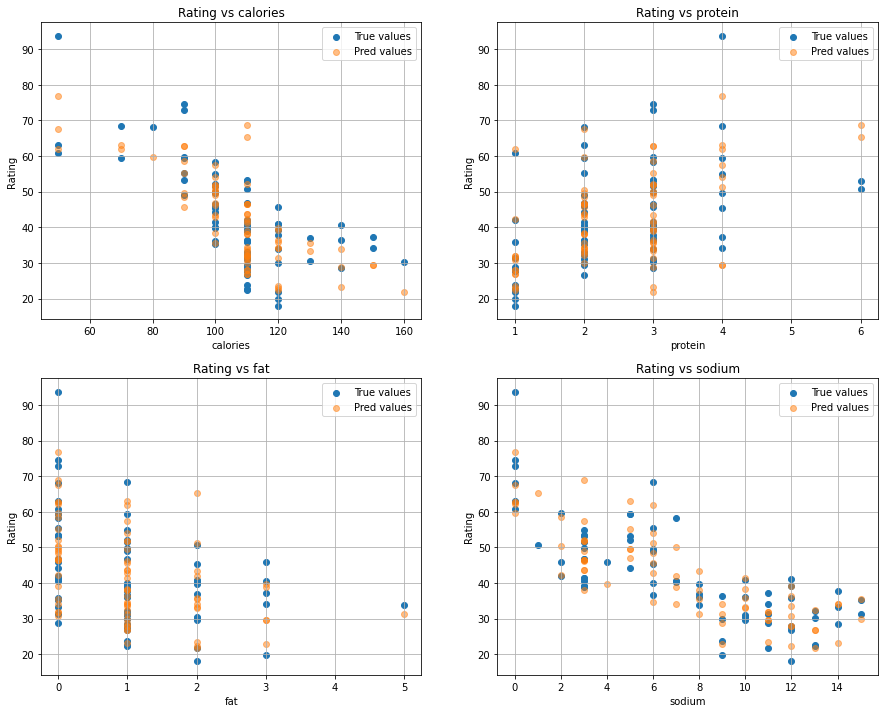

In [90]:

#Simple plot to verify the answer

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(15,12))

for i, axe in enumerate(axes.flat):
    
    axe.scatter(X[:,i], y, label='True values')
    axe.scatter(X[:,i], y_pred02, label='Pred values', alpha=0.5)
    axe.set_title('Rating vs '+ new_df.columns[i])
    axe.set_xlabel(new_df.columns[i])
    axe.set_ylabel('Rating')
    axe.legend()
    axe.grid()

plt.show()


**Exercício 3:** Nossos modelos de regressão linear são bons preditores da nota de avaliação do cereal? Qual o melhor modelo? Calcule os coeficientes de determinação e faça uma análise dos valores obtidos para responder a estas perguntas.

In [99]:
# insira seu código aqui

from sklearn.metrics import r2_score

r2_model1 = r2_score(y, y_pred01)
r2_model2 = r2_score(y, y_pred02)

print('Coeficiente de determinação r2_score model regressão linear simples: {0:.3f}'.format(r2_model1))
print('Coeficiente de determinação r2_score model regressão linear múltiplo: {0:.3f}'.format(r2_model2))

Coeficiente de determinação r2_score model regressão linear simples: 0.481
Coeficiente de determinação r2_score model regressão linear múltiplo: 0.834


Pode-ser observar que o modelo de regressão linear múltipla utilizado apresenta melhor qualidade de ajuste comparado ao modelo de regressão linear simples utilizado.<br>
Observar-se a qualidade de ajuste, aproximada, para o modelos, sendo: <br>
- Qualidade do ajuste modelo regressão linear simples: 48%
- Qualidade do ajuste modelo regressão linear múltimpla: 83%<br><br>
As plotagens acima também nos ajudam a ter uma ideia da qualidade dos modelos aplicado ao problema.

## Referências extra

[1]https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados<br>
[2]https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html<br>
[3]https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
[4]http://www.portalaction.com.br/analise-de-regressao/16-coeficiente-de-determinacao<br>
